## CNN Tutorial

In [51]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [21]:
(train_images, train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [22]:
 #Normalize pixel value from 0 to 255
train_images,test_images=train_images/255.0,test_images/255.0

In [23]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

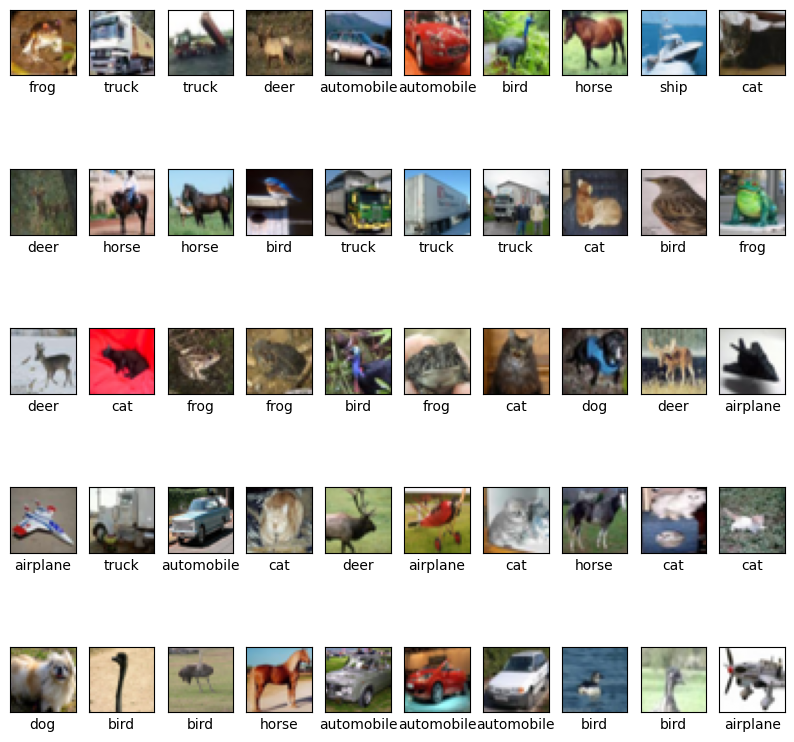

In [24]:
plt.figure(figsize=(10,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [37]:
## Creating convolution layer
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [40]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [50]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history= model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 46ms/step - loss: 1.5774 - accuracy: 0.4219 - val_loss: 1.3237 - val_accuracy: 0.5274
Epoch 2/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.2079 - accuracy: 0.5742 - val_loss: 1.1094 - val_accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0533 - accuracy: 0.6303 - val_loss: 1.0735 - val_accuracy: 0.6257
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9456 - accuracy: 0.6664 - val_loss: 1.0179 - val_accuracy: 0.6462
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8712 - accuracy: 0.6938 - val_loss: 0.9470 - val_accuracy: 0.6685
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8118 - accuracy: 0.7150 - val_loss: 0.8969 - val_accuracy: 0.6884
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7657 - accuracy: 0.7320 - val_loss: 0.9188 -

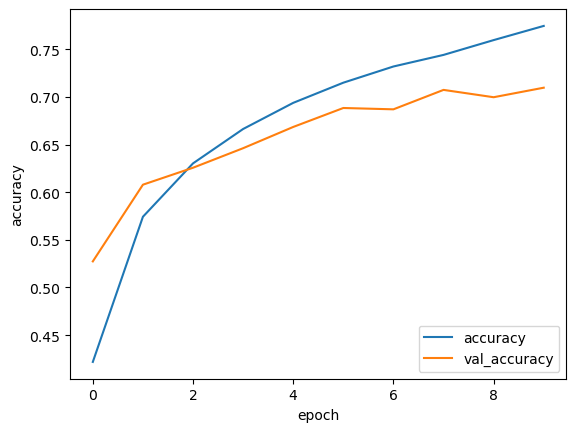

In [52]:
## plotting performance

plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()

In [53]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 4s - loss: 0.8723 - accuracy: 0.7097 - 4s/epoch - 12ms/step


In [55]:
print(f"Test Accuracy : {test_acc*100}")

Test Accuracy : 70.96999883651733
